In [ ]:
#Code for Figure 4.1
from qutip import *
from pylab import *
from numpy import *
%matplotlib inline

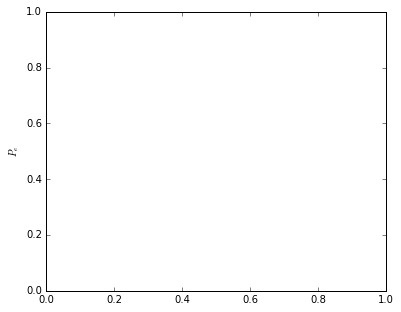

In [56]:
#Non degenerate Lambda steady state function
ustate = basis(3,0)
excited = basis(3,1)
ground = basis(3,2)
nsteps=200
delta_min=-3
delta_max=3
xmin=delta_min
xmax=delta_max
d=(delta_max-delta_min)*(nsteps)**(-1)
omega1=.1
omega2=0.2  # paper says these are 0.2*gamma
phi=0


#decay rates
gamma_eu=.1 
gamma_eg=5
sigma_ee = tensor(excited * excited.dag())
sigma_uu = tensor(ustate * ustate.dag())
sigma_gg = tensor(ground * ground.dag())
sigma_ue = tensor(ustate * excited.dag())
sigma_ge = tensor(ground * excited.dag())
clist=[]
dlist=[]

#collapse operators
c1=sqrt(gamma_eg)*sigma_ge
c2=sqrt(gamma_eu)*sigma_ue
c1dc1=c1.dag()*c1
c2dc2=c2.dag()*c2
fig=figure(figsize=(6.1,5))
fig.subplots_adjust(wspace=0)
fig.subplots_adjust(hspace=0)
ax1 = fig.add_subplot(111)
ax1.set_ylabel(r'$P_e$')

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


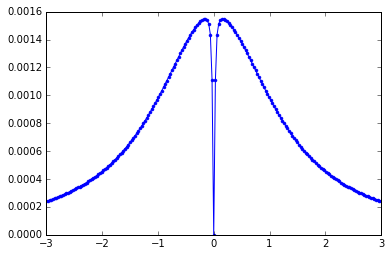

In [57]:
for i in range (0,nsteps+1):
    #system hamiltonian
    H=(-delta_min)*(sigma_ee-sigma_gg)+(phi)*(sigma_ee-sigma_uu)+omega1*(sigma_ge+sigma_ge.dag())+omega2*(sigma_ue+sigma_ue.dag())
    #Liouvillian
    #L=liouvillian(H,[c1,c2])
    #rhoss=steady(L)
    rhoss = steadystate(H,[c1,c2])
    prob_excited=rhoss[1,1]
    clist.append(prob_excited)
    dlist.append(delta_min)
    delta_min=delta_min+d
    
# ax1.plot(dlist,clist)
# locator_params(axis = 'y', nbins = 6)
# show()
plot(dlist,clist,'.-')

In [58]:
H

Quantum object: dims = [[3], [3]], shape = [3, 3], type = oper, isherm = True
Qobj data =
[[ 0.   0.2  0. ]
 [ 0.2 -3.   0.1]
 [ 0.   0.1  3. ]]

In [35]:
delta_min

9.059999999999993

In [34]:
phi

0

In [51]:
c1

Quantum object: dims = [[3], [3]], shape = [3, 3], type = oper, isherm = False
Qobj data =
[[ 0.          0.          0.        ]
 [ 0.          0.          0.        ]
 [ 0.          2.23606798  0.        ]]

In [53]:
ground * excited.dag()

Quantum object: dims = [[3], [3]], shape = [3, 3], type = oper, isherm = False
Qobj data =
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  1.  0.]]